## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer hear  

损失函数为：  
$L(w,b) = -\sum_{i=0}^{M}y_{i}(wx_{i}+b)$
即：  
$L(w,b) = -((\sum_{i=0}^{M}y_{i}x_{i}^{0})w_{0} + (\sum_{i=0}^{M}y_{i}x_{i}^{1})w_{1} + b\sum_{i=0}^{M}y_{i})$

分别对w,b 求导

$\frac{\partial L(w,b)}{\partial w} = -\sum_{i=0}^{M}y_{i}x_{i}$  

$\frac{\partial L(w,b)}{\partial b} = -\sum_{i=0}^{M}y_{i}$  

令学习率为$\alpha $,则参数更新为：

$w_{t+1} = w_{t} + \alpha \sum_{n\in M}x_{i}y_{i}$

$b_{t+1} = b_{t} + \alpha \sum_{n\in M}y_{i}$
#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_test.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45,)
<class 'numpy.ndarray'>


In [4]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   
        ##  samll std and zero mean gaussian   
        
        weight = 0.01*np.random.randn(weight_dimension,num_cls)#均值为0，方差为0.01
        
        #########################################
        
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        
        data = (data -  np.min(data))/(np.max(data )- np.min(data))#min-max标准化
        
        #####################################
        #norm_data = (data-self.sample_mean)/self.sample_std
        return data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        train_acc = 0.0000 
        for i in range(self.num_epoch):
            for j in shuffle_idx:
                result = np.dot(X_train[j], self.weight)
                
         
                if result < 0.5:
                    result =0
                if 0.5 <= result < 1.5 :
                    result = 1
                if result >= 1.5:
                    result = 2
                    
                self.weight[1] += self.lr * (y_train[j] - result) * (X_train[j][1] + X_train[j][2] + X_train[j][3])
                self.weight[2] += self.lr * (y_train[j] - result) * (X_train[j][1] + X_train[j][2] + X_train[j][3])
                self.weight[3] += self.lr * (y_train[j] - result) * (X_train[j][1] + X_train[j][2] + X_train[j][3])
                self.weight[4] += self.lr * (y_train[j] - result) * (X_train[j][1] + X_train[j][2] + X_train[j][3])
                self.weight[0] += self.lr * (y_train[j] - result) 
                
                if result == y_train[j]:
                    train_acc += 1
        train_acc = train_acc/(len(shuffle_idx)*self.num_epoch)
        
        ##############################################
        
        
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        X_test = self.data_preprocessing(data=X_test)
     
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        test_acc = 0.0000
        for i in range(num_sample):
            result = np.dot(X_test[i], self.weight[1:]) + self.weight[0]
            
            if result < 0.5:
                result =0
            if 0.5 <= result < 1.5 :
                result = 1
            if result >= 1.5:
                result = 2
            if result == y_test[i]:
                test_acc += 1
        test_acc = test_acc/num_sample
        
        #########################################
        
           
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
    
        self.X_train = np.hstack((np.ones((self.X_train.shape[0],1)), self.X_train))
        
        ######################################################
         
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.390 tst_acc:0.533
epoch: 1 traing_acc:0.440 tst_acc:0.533
epoch: 2 traing_acc:0.438 tst_acc:0.533
epoch: 3 traing_acc:0.478 tst_acc:0.533
epoch: 4 traing_acc:0.553 tst_acc:0.533
epoch: 5 traing_acc:0.631 tst_acc:0.578
epoch: 6 traing_acc:0.682 tst_acc:0.578
epoch: 7 traing_acc:0.705 tst_acc:0.622
epoch: 8 traing_acc:0.750 tst_acc:0.600
epoch: 9 traing_acc:0.770 tst_acc:0.600
epoch: 10 traing_acc:0.769 tst_acc:0.644
epoch: 11 traing_acc:0.771 tst_acc:0.644
epoch: 12 traing_acc:0.775 tst_acc:0.644
epoch: 13 traing_acc:0.774 tst_acc:0.644
epoch: 14 traing_acc:0.783 tst_acc:0.622
epoch: 15 traing_acc:0.787 tst_acc:0.622
epoch: 16 traing_acc:0.799 tst_acc:0.622
epoch: 17 traing_acc:0.801 tst_acc:0.622
epoch: 18 traing_acc:0.802 tst_acc:0.600
epoch: 19 traing_acc:0.800 tst_acc:0.578
epoch: 20 traing_acc:0.800 tst_acc:0.578
epoch: 21 traing_acc:0.803 tst_acc:0.556
epoch: 22 traing_acc:0.821 tst_acc:0.511
epoch: 23 traing_acc:0.806 tst_acc:0.511
epoch: 24 traing_acc:0.823

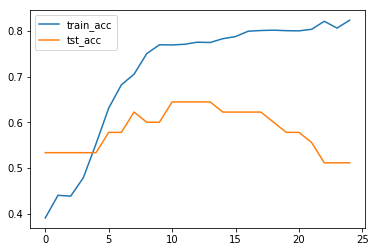

In [7]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
model = MultiClsPLA(X_train, y_train, X_test, y_test, lr = 0.01, num_epoch = 15, weight_dimension = 5, num_cls = 1)
model.train()
model.vis_acc_curve()